## <font color='navy'> Examen 3. Laboratorio de Aprendizaje Estadístico.
    
### <font color='navy'> Modelos de Ensamble: Árboles y Boosting

Luis Fernando Márquez Bañuelos | 744489

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

## <font color='navy'> Importación de datos

In [2]:
data = pd.read_csv('hr_role.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_satisfied
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,80,1,6,3,3,2,2,2,2,False


In [3]:
len(data[data['Attrition'] == 1])

0

## <font color='navy'> Explicación de variables

## <font color='navy'> Funciones

In [4]:
def histograma(probabilidades: np.ndarray, y_test: str):
    juntar = pd.DataFrame({
    'real': y_test,
    'probabilidades': probabilidades
    })
    plt.figure(figsize=(10, 5))
    plt.hist(juntar[juntar.real == 1]['probabilidades'], density=True, alpha=0.5, label = '1', color= 'skyblue')
    plt.hist(juntar[juntar.real == 0]['probabilidades'], density=True, alpha=0.5, label = '0', color = 'indianred')
    plt.title(f'Histograma de probabilidades de')
    plt.xlabel('Probabilidad')
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()

## <font color='navy'> Preparación de Datos

In [5]:
data['Attrition'] = data['Attrition'].map({'Yes': True, 'No': False})
target = 'Attrition'
data = pd.get_dummies(data)

In [6]:
X = data.copy()
X = X.drop(columns=[target])
y = data[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color='navy'> Árbol de Decisión

### <font color='navy'> Max Depth 2

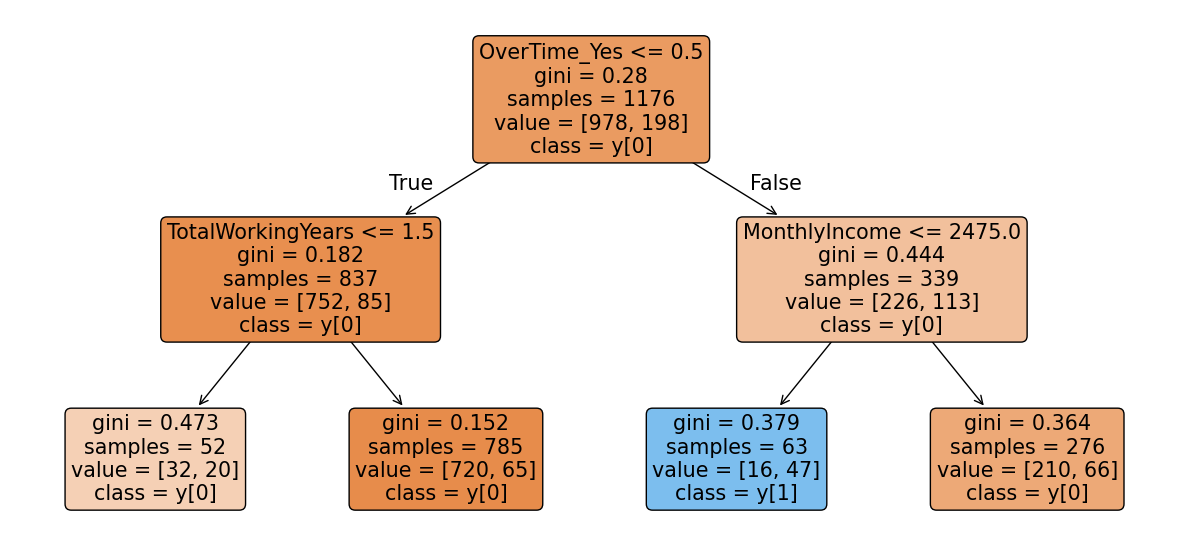

In [8]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
plt.figure(figsize=(15, 7))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, class_names=True);

bla bla bla

### <font color='navy'> Mejor Árbol

In [18]:
pipeline = Pipeline([
    ('tree', DecisionTreeClassifier())
])

params = {
    'tree__max_depth': list(range(1, 13)),
    'tree__min_samples_split': list(range(2, 10)),
    'tree__min_samples_leaf': list(range(1, 10)),
    'tree__max_features': ['sqrt', 'log2', None],
}

grid_tree = GridSearchCV(estimator=pipeline, param_grid=params, n_jobs=-1, cv=5, scoring='roc_auc').fit(X_train, y_train)

In [19]:
grid_tree.best_params_

{'tree__max_depth': 4,
 'tree__max_features': 'sqrt',
 'tree__min_samples_leaf': 9,
 'tree__min_samples_split': 6}

In [20]:
best_model = grid_tree.best_estimator_.named_steps['tree']
predicciones = best_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predicciones)

0.6268476621417798

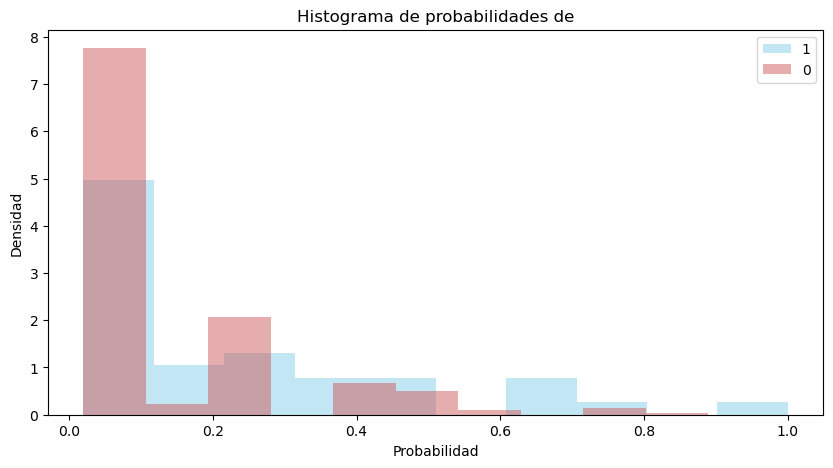

,variables,importancia
0,OverTime_Yes,0.344350
1,MaritalStatus_Single,0.187345
2,MonthlyIncome,0.118438
3,YearsAtCompany,0.093268
4,BusinessTravel_Travel_Frequently,0.085248
5,DailyRate,0.081003
6,DistanceFromHome,0.034855
7,JobRole_Research Scientist,0.024452
8,JobInvolvement,0.019019
9,MaritalStatus_Divorced,0.010547


In [21]:
histograma(predicciones, y_test)

importancia = pd.DataFrame({
    'variables': X.columns,
    'importancia': best_model.feature_importances_
})
importancia.sort_values('importancia', ascending=False, inplace=True)
importancia.reset_index(drop=True, inplace=True)
importancia.head(10)